<a href="https://colab.research.google.com/github/solacerace/codeworks/blob/master/Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Default Prediction using Machine Learning**


We conducted binary classification to predict credit defaulters using features including age, sex, marital status, education, history of past payments, amount of bill statements, and previous payment behavior. We evaluated the performance of five distinct machine learning techniques: Logistic Regression, Logistic Regression with standard feature values, Logistic Regression with important features, Decision Tree, and Random Forest. The results demonstrate that Random Forest outperforms the other methods, followed by Decision Tree, based on key metrics such as accuracy, precision, recall, F1-Score, and AUC.



In [4]:
import pandas as pd
import io

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
from google.colab import files
uploaded = files.upload()

Saving default_of_credit_card_clients_-_70__random_subset.xls to default_of_credit_card_clients_-_70__random_subset.xls


**NOTE**: Specify the file path from your machine.

In [10]:
file_name='default_of_credit_card_clients_-_70__random_subset.xls'
data = pd.read_excel(io.BytesIO(uploaded[file_name]))
data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,29655,30000,1,2,1,48,0,0,0,0,...,25571,40188,27544,3006,3000,2000,3000,8150,2000,1
1,15009,30000,1,3,1,43,1,3,2,2,...,23491,22818,24321,0,0,2645,0,2029,1027,1
2,26168,80000,2,2,1,35,3,2,0,0,...,56592,52766,48208,9,2203,3006,3005,2005,2000,1
3,12174,150000,1,1,1,51,0,0,0,0,...,46349,47360,48717,4000,4000,1482,1577,2000,1500,0
4,10894,20000,1,2,1,43,-1,-1,-1,-1,...,390,780,780,1837,390,390,780,0,0,0


In [11]:
data.shape

(20999, 25)

**Rename the columns to a meaningful names for better understanding**

In [12]:
column_names = ['ID','LIMIT_BAL','GENDER','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Default']

In [13]:
len(column_names)

25

In [14]:
data.set_axis(column_names, axis=1, inplace=True)

In [15]:
data.head().T

,0,1,2,3,4
ID,29655,15009,26168,12174,10894
LIMIT_BAL,30000,30000,80000,150000,20000
GENDER,1,1,2,1,1
EDUCATION,2,3,2,1,2
MARRIAGE,1,1,1,1,1
AGE,48,43,35,51,43
PAY_1,0,1,3,0,-1
PAY_2,0,3,2,0,-1
PAY_3,0,2,0,0,-1
PAY_4,0,2,0,0,-1


In [16]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

**Exploring Data**

We see that in the available data 22.1% of the customers have defaulted and 77.9% have not-defaulted.

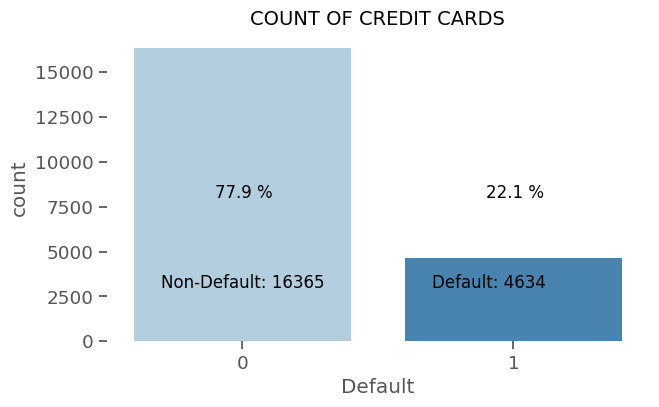

In [17]:
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(x=data['Default'], palette="Blues")
#sns.countplot('Default',data=data, palette="Blues")
plt.annotate('Non-Default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);


Lets look at each of the features of the data - their mean, std, min and max values, to get better sense of the data.

In [18]:
set_option('display.width', 100)
#set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

             count           mean            std       min      25%       50%       75%        max
ID         20999.0   14949.815706    8652.280350       1.0   7424.5   14931.0   22431.0    29999.0
LIMIT_BAL  20999.0  167661.301967  129526.867077   10000.0  50000.0  140000.0  240000.0  1000000.0
GENDER     20999.0       1.605362       0.488784       1.0      1.0       2.0       2.0        2.0
EDUCATION  20999.0       1.854898       0.789820       0.0      1.0       2.0       2.0        6.0
MARRIAGE   20999.0       1.552312       0.522760       0.0      1.0       2.0       2.0        3.0
AGE        20999.0      35.472118       9.208529      21.0     28.0      34.0      41.0       75.0
PAY_1      20999.0      -0.011762       1.126787      -2.0     -1.0       0.0       0.0        8.0
PAY_2      20999.0      -0.128673       1.199389      -2.0     -1.0       0.0       0.0        7.0
PAY_3      20999.0      -0.161103       1.201604      -2.0     -1.0   

Majority of the custumers are married with average age of 35.

In [19]:
data

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,29655,30000,1,2,1,48,0,0,0,0,...,25571,40188,27544,3006,3000,2000,3000,8150,2000,1
1,15009,30000,1,3,1,43,1,3,2,2,...,23491,22818,24321,0,0,2645,0,2029,1027,1
2,26168,80000,2,2,1,35,3,2,0,0,...,56592,52766,48208,9,2203,3006,3005,2005,2000,1
3,12174,150000,1,1,1,51,0,0,0,0,...,46349,47360,48717,4000,4000,1482,1577,2000,1500,0
4,10894,20000,1,2,1,43,-1,-1,-1,-1,...,390,780,780,1837,390,390,780,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20994,17911,100000,1,2,2,28,2,0,0,0,...,54288,25759,25775,5100,2825,5000,0,2000,0,1
20995,26248,150000,2,2,2,44,0,0,0,0,...,43879,44446,45394,3000,2636,3000,1528,1600,2000,0
20996,1598,110000,2,1,2,29,0,0,2,0,...,106665,92417,90730,7845,4000,4000,3500,9500,9600,0
20997,4259,310000,2,1,1,37,-1,-1,-1,-1,...,7443,4221,8172,4373,26863,7443,0,8172,31362,0


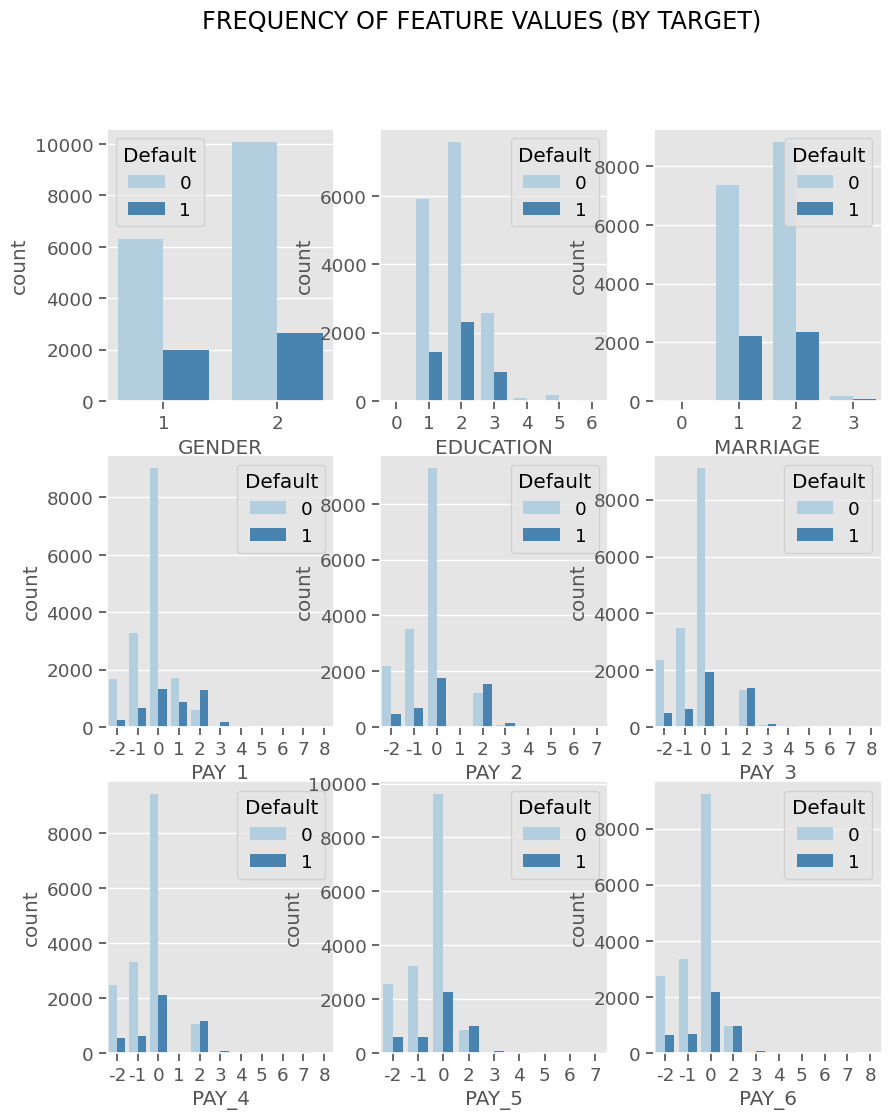

In [20]:
# Creating a new dataframe with categorical variables
subset = data[['GENDER', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(10, 12), facecolor='white')
f.suptitle('FREQUENCY OF FEATURE VALUES (BY TARGET)')
ax1 = sns.countplot(x="GENDER", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

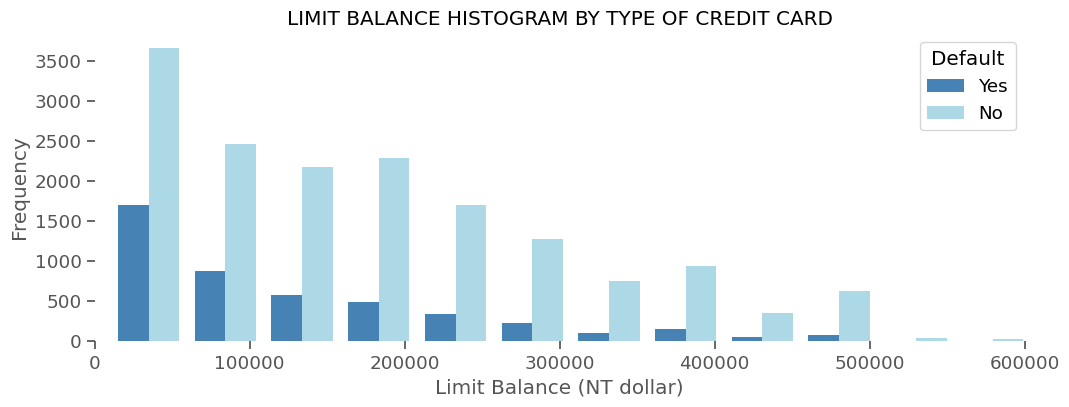

In [21]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 20,  color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

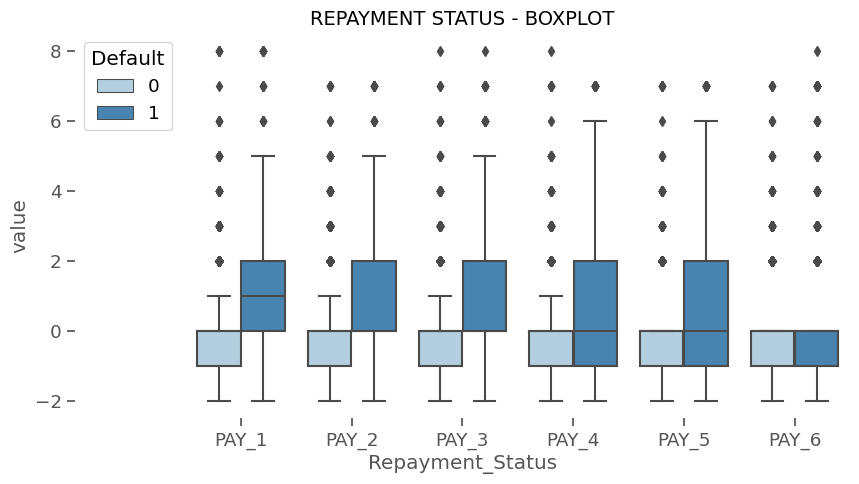

In [22]:
Repayment = data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

Among the data plotted above - PAY_1,PAY_2,PAY_3 have more predictive power than others.

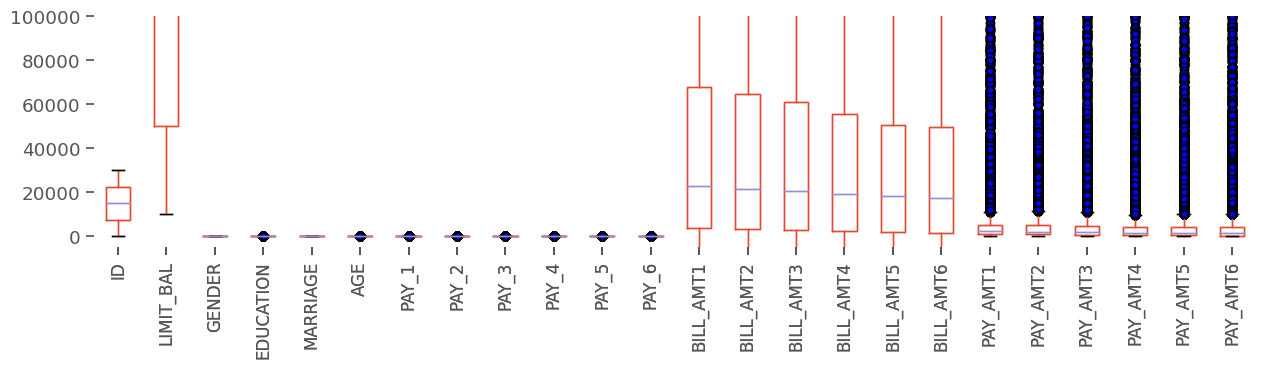

In [23]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= data.drop('Default', axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.box(False);

We have standardization the data below, i.e, all features are centered around zero mean and have variance one.

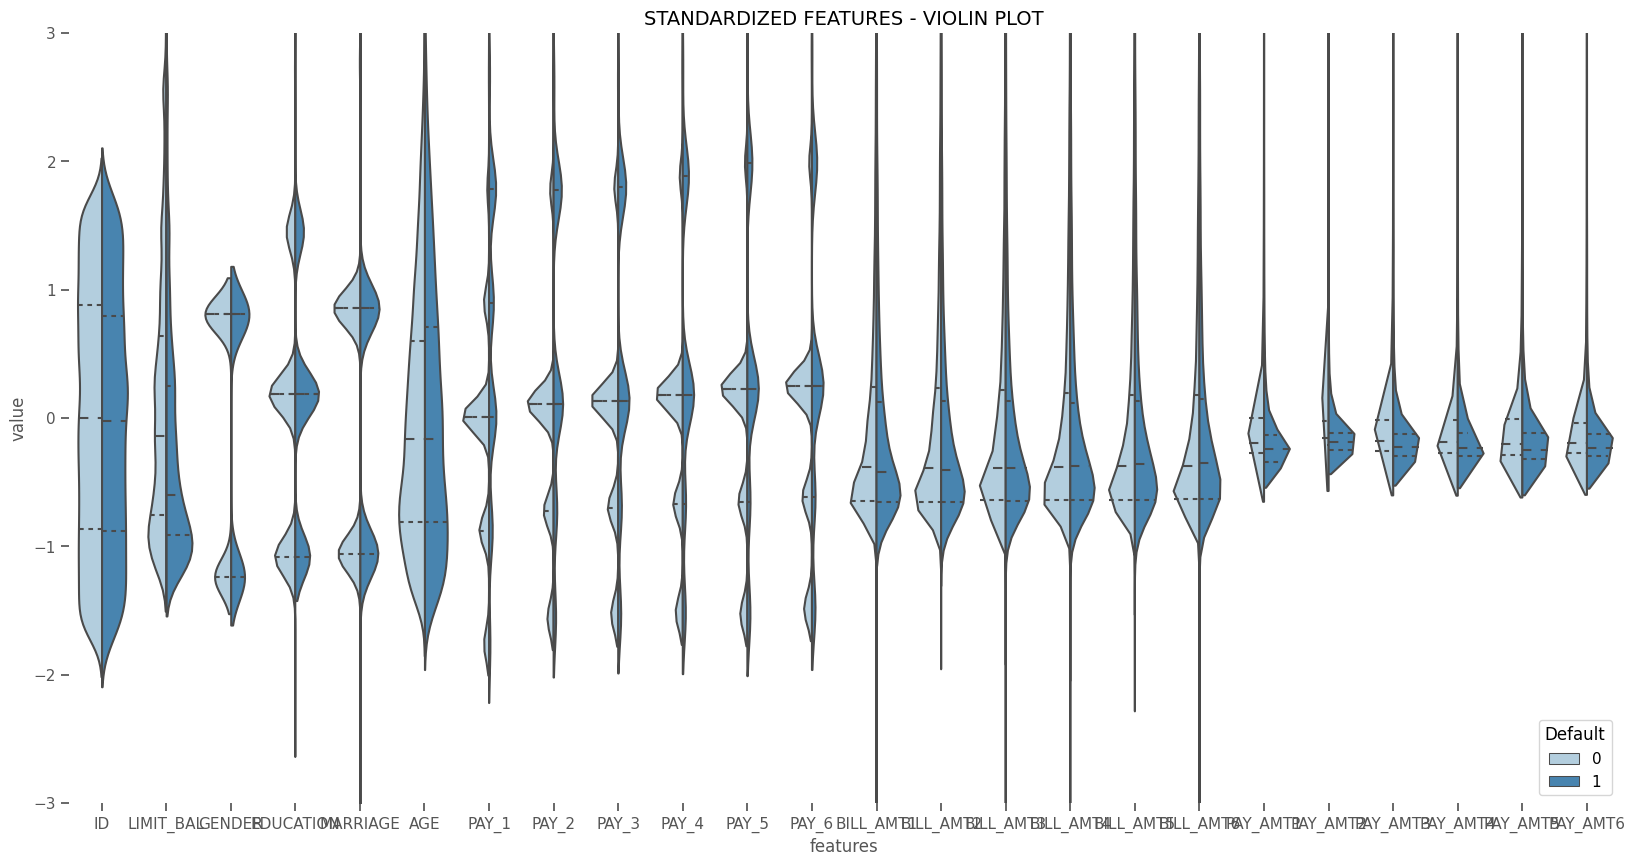

In [24]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="Default", data=data_st,split=True,
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

**Correlation Matrix**

A correlation matrix of all variables is shown in the heatmap below.
- The only feature with a notable positive correlation with the dependent variable ‘Default’ is re-payment status during the last month (September).
- The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default.

Looking at correlations matrix, defined via Pearson function

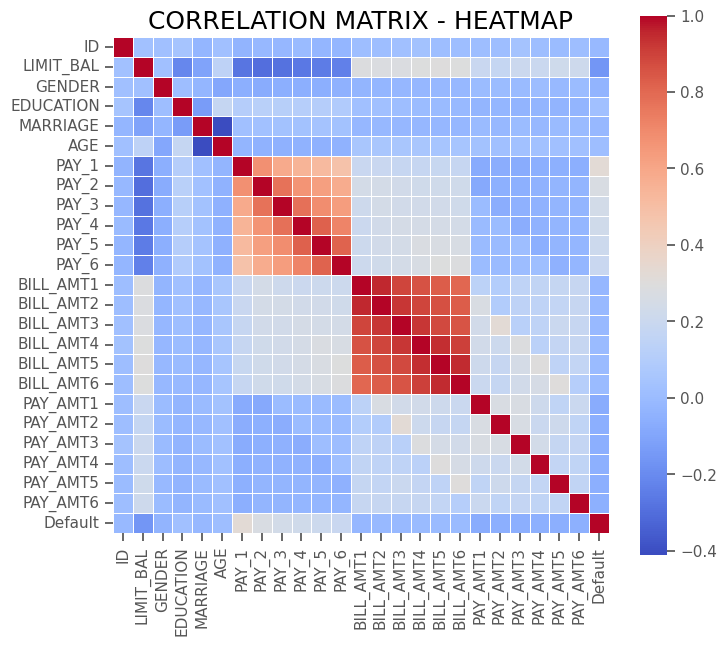

In [25]:
#  looking at correlations matrix, defined via Pearson function
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f',
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [26]:
# Original dataset
X = data.drop('Default', axis=1)
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [27]:
# Dataset with standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                                random_state=42)

In [28]:
# Stores the report of each df
report_df = pd.DataFrame()

**Feature Extraction**


**Recursive Feature Elimination(RFE)**
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [29]:
NUM_FEATURES = 3
model = LogisticRegression()
rfe_stand = RFE(model, n_features_to_select = NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
#print("St Model Num Features:", fit_stand.n_features_)
#print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [22  9 17 11 15 10  1  4  6 13 21 18  1  5  2  8 19 20  3  1  7 16 12 14]
Standardized Model Score with selected features is: 0.812753 (0.000000)


In [30]:
feature_names = np.array(features.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['PAY_1' 'BILL_AMT1' 'PAY_AMT2']



*   Repayment status in September (PAY_0)
*   Amount of bill statement in September (BILL_AMT1)
*   Amount of previous payments in August (PAY_AMT2)

In [31]:
# Dataset with three most important features
Ximp = stdX[['PAY_1', 'BILL_AMT1', 'PAY_AMT2']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)

**1.1 Logistic Regression (original data)**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

The parameter ‘C’ was tuned using RandomizedSearchCV( ) for the different datasets: original, standardized and with most important features. Once the parameter ‘C’ was defined for each dataset, the logistic regression model initiated and then fitted to the training data, as it was described in the methodology.

In [32]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


Accuracy: 0.7792857142857142


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



              precision    recall  f1-score      support
0              0.779286  1.000000  0.875953  3273.000000
1              0.000000  0.000000  0.000000   927.000000
accuracy       0.779286  0.779286  0.779286     0.779286
macro avg      0.389643  0.500000  0.437977  4200.000000
weighted avg   0.607286  0.779286  0.682618  4200.000000

Average 5-Fold CV Score: 0.7793 , Standard deviation: 0.0002


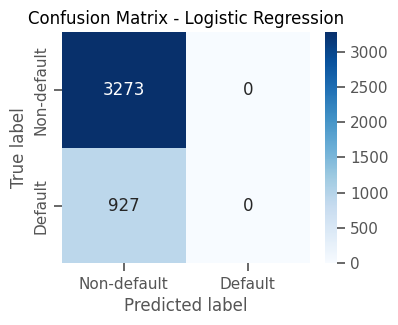

In [33]:
LR = LogisticRegression(C=0.00005, random_state=0, solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
report_df["LogisticRegression(original data) "]= df["weighted avg"].T
print()
print(df.T)
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

***1.2 Logistic Regression (standardized features)***

The logistic regression is performed on the standardized features.

In [34]:
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_))

Tuned Logistic Regression Parameters with standardized features: {'C': 2275.845926074791}


Accuracy: 0.8169047619047619

              precision    recall  f1-score      support
0              0.823514  0.973724  0.892342  3273.000000
1              0.739394  0.263215  0.388226   927.000000
accuracy       0.816905  0.816905  0.816905     0.816905
macro avg      0.781454  0.618470  0.640284  4200.000000
weighted avg   0.804948  0.816905  0.781077  4200.000000

Average 5-Fold CV Score: 0.8111 , Standard deviation: 0.0034


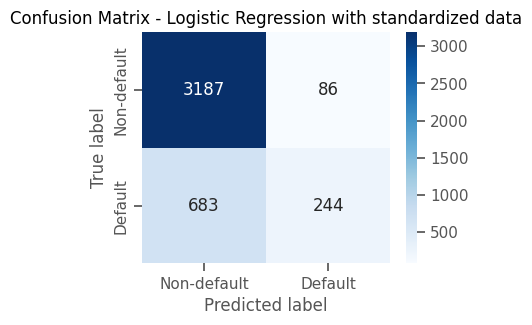

In [35]:
LRS = LogisticRegression(C=3.73, random_state=0)
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation
cv_scores =cross_val_score(LRS, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
df = pd.DataFrame(classification_report(ystd_test, y_pred, output_dict=True))
report_df["LogisticRegression (Standard Features) "]= df["weighted avg"].T
print()
print(df.T)
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

The performance of the logistic regression model standardized data improved compared to the model built with the original dataset. By using the standardized dataset, the model is able to predict defaults; however, with a very low recall (0.26).

**1.3 Logistic Regression (most important features)**

Accuracy: 0.8123809523809524

              precision    recall  f1-score      support
0              0.822811  0.967614  0.889357  3273.000000
1              0.698006  0.264293  0.383412   927.000000
accuracy       0.812381  0.812381  0.812381     0.812381
macro avg      0.760408  0.615954  0.636384  4200.000000
weighted avg   0.795265  0.812381  0.777688  4200.000000

Average 5-Fold CV Score: 0.8124 , Standard deviation: 0.0026


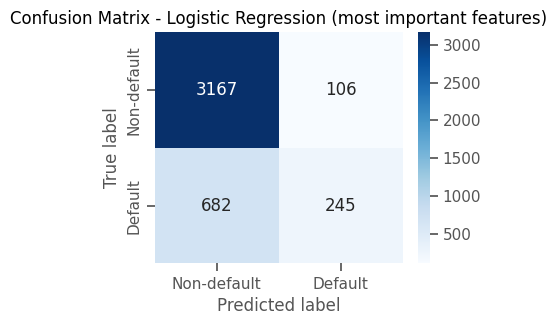

In [36]:
LR_imp = LogisticRegression(C=3.73, random_state=0)
LR_imp.fit(X_tr, y_tr)
y_pred = LR_imp.predict(X_t)
print('Accuracy:', metrics.accuracy_score(y_pred,y_t))

## 5-fold cross-validation
cv_scores =cross_val_score(LR_imp, Ximp, y, cv=5)

# Print the 5-fold cross-validation scores
df = pd.DataFrame(classification_report(y_t, y_pred, output_dict=True))
report_df["LogisticRegression (important features) "]= df["weighted avg"].T
print()
print(df.T)
print()

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_t,LR_imp.predict(X_t))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (most important features)");

**1.4 Decision Tree Classifier**



Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [37]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 4, 'criterion': 'entropy'}


Accuracy: 0.8097619047619048

              precision    recall  f1-score      support
0              0.830749  0.949282  0.886069  3273.000000
1              0.639130  0.317152  0.423937   927.000000
accuracy       0.809762  0.809762  0.809762     0.809762
macro avg      0.734940  0.633217  0.655003  4200.000000
weighted avg   0.788456  0.809762  0.784070  4200.000000

Average 5-Fold CV Score: 0.8147 , Standard deviation: 0.0052


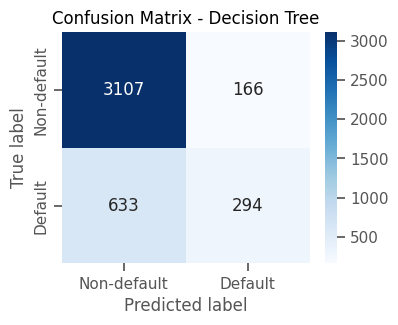

In [38]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7,
                                     max_features= 9, min_samples_leaf= 2,
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
df = pd.DataFrame(classification_report(y_t, y_pred, output_dict=True))
report_df["DecisionTree "]= df["weighted avg"].T
print()
print(df.T)
print()

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

**1.5 Random Forest Classifier**

Random forest classifier is comprised of multiple decision trees. It creates different random subset of decision trees from the training set as its predictors and selects the best solution by means of voting. As a result, the Random Forest model avoids overfitting problems.

In [39]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist,
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.8245238095238095

              precision    recall  f1-score      support
0              0.841411  0.954782  0.894518  3273.000000
1              0.695473  0.364617  0.478415   927.000000
accuracy       0.824524  0.824524  0.824524     0.824524
macro avg      0.768442  0.659699  0.686467  4200.000000
weighted avg   0.809200  0.824524  0.802678  4200.000000

Average 5-Fold CV Score: 0.8193 , Standard deviation: 0.0033


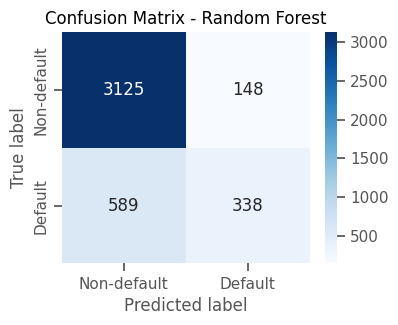

In [40]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6,
                                     max_features= 5, n_estimators= 150,
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(Ran, X, y, cv=5)


# Print the 5-fold cross-validation scores
df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
report_df["Random Forest "]= df["weighted avg"].T
print()
print(df.T)
print()

print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

**2 Comparison of model performance**

The metrics used to evaluate performance of the different models: accuracy, precision, recall, f1-score, AUC (ROC), and confusion matrix were employed.

**Receiver operating characteristic (ROC) Curve**


Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. The AUC is the Area Under Curve. If the AUC is high, the model is better distinguishing between positive and negative class. The ROC curve is plotted with “True Positive Rate” or Recall (on the y-axis) against the “False Positive Rate” (on the x-axis). When the AUC is 0.5 means that the model has no discrimination capacity to distinguish between positive and negative class.

The Receiver operating characteristic (ROC) Curve with the respective area under the curve (AUC) are shown below for each model.

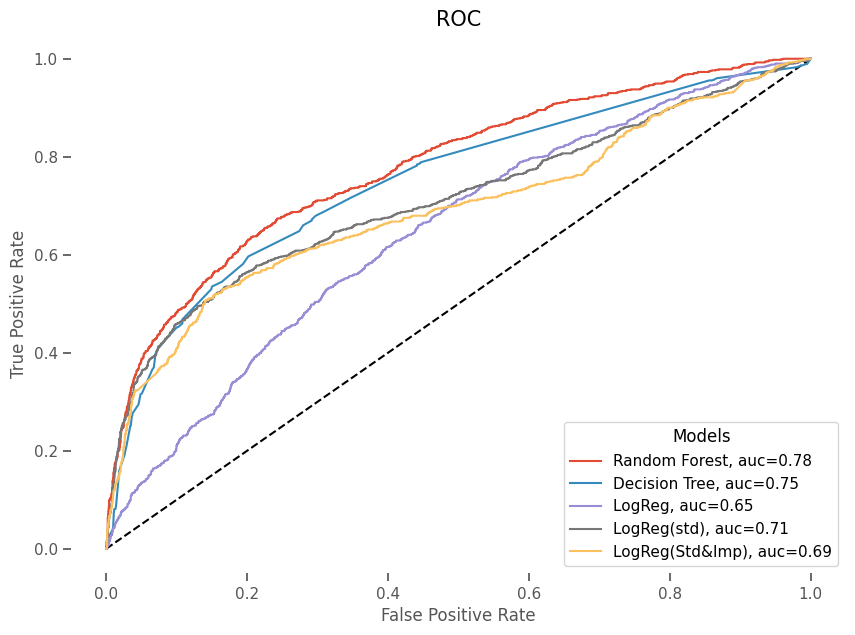

In [41]:
y_pred_proba_RF = Ran.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_LRS = LRS.predict_proba(Xstd_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(ystd_test,  y_pred_proba_LRS)
auc4 = metrics.roc_auc_score(ystd_test, y_pred_proba_LRS)

y_pred_proba_LRimp = LR_imp.predict_proba(X_t)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_t,  y_pred_proba_LRimp)
auc5 = metrics.roc_auc_score(y_t, y_pred_proba_LRimp)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="LogReg(std), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="LogReg(Std&Imp), auc="+str(round(auc5,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

The highest AUC is obtained for the Random Forest Classifier model, with a value of 0.78. This means there is 78% chance that the model will be able to distinguish between default class and non-default class.

**Mean Accuracy (coss-validation)**

K-fold cross-validation is a popular technique in machine learning and statistics for assessing the performance of a predictive model, estimating its generalization capabilities, and minimizing the risk of overfitting. It is particularly useful when you have a limited amount of data and want to make the most of it for model evaluation. Here's a description of K-fold cross-validation:

K-fold cross-validation can be used in conjunction with accuracy as an evaluation metric for classification models. Accuracy is a commonly used metric to assess the performance of classification models, and K-fold cross-validation helps provide a more robust and reliable estimate of a model's accuracy.

In [42]:
# Append different models
models = []

# Logistic Regression
models.append(('LogReg',
               LogisticRegression(C=3.73, random_state=0, solver='lbfgs', max_iter=1000),'none'))

# Logistic Regression (with standardized data)
models.append(('LogReg(Std)',
               LogisticRegression(C=3.73, random_state=0, solver='lbfgs', max_iter=1000),'Std'))

# Logistic Regression with standardized and important features
models.append(('LogReg(Std&Imp)',
               LogisticRegression(C=3.73, random_state=0, solver='lbfgs', max_iter=1000),'imp'))

# Decision Tree
models.append(('Decision Tree',
              DecisionTreeClassifier(criterion= 'entropy', max_depth= 4,
                                     max_features= 7, min_samples_leaf= 8,
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest',
              RandomForestClassifier(criterion= 'gini', max_depth= 6,
                                     max_features= 5, n_estimators= 150,
                                     random_state=0), 'none'))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:
    if Std == 'Std':
        cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    elif Std == 'none':
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, Ximp, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LogReg: 0.779275 (0.000202)
LogReg(Std): 0.811086 (0.003432)
LogReg(Std&Imp): 0.812372 (0.002614)
Decision Tree: 0.806896 (0.002465)
Random Forest: 0.819277 (0.003333)


The Random Forest Classifier achieves the highest mean accuracy at 0.819, although it exhibits relatively higher variation (0.0096). In contrast, all models generally demonstrate similar mean accuracy levels. However, it's crucial to note that the accuracy metric can be deceptive due to class imbalance, where the proportion of non-default credit cards significantly outweighs defaults.

This imbalance renders accuracy less informative as it overlooks the rates of false positives (instances where non-default credit cards are wrongly predicted as default) and false negatives (instances where default credit cards are incorrectly predicted as non-default).

Both false positives and false negatives carry adverse consequences for the bank:



*   False positives can result in customer dissatisfaction as non-default customers are erroneously identified as default, potentially leading to unwarranted interventions and customer inconvenience.
*   False negatives can translate into substantial financial losses for the bank since they entail the failure to accurately identify defaulting customers, potentially resulting in delayed or missed risk mitigation actions.

Considering these factors, it is advisable, especially in cases of imbalanced datasets, to employ additional evaluation metrics such as precision, recall, F1-score, or the area under the ROC curve (AUC-ROC). These metrics offer a more comprehensive assessment of model performance, accounting for both false positives and false negatives, and provide a more accurate representation of the real-world impact of model predictions, particularly in contexts like credit risk assessment.

**Precision, Recall, F1-score**

**Precision**: This metric assesses the accuracy of positive predictions. It tells us the proportion of instances the model predicted as positive that were indeed positive. Precision is crucial when making a false positive prediction has significant consequences, such as in medical diagnoses or fraud detection.

**Recall**: Also known as sensitivity or true positive rate, recall gauges the model's ability to correctly identify all positive instances. It answers the question: "Out of all the actual positive instances, how many did the model correctly predict?" Recall is vital when missing a true positive (a false negative) is costly, as in medical screenings or fault detection.

**F1-Score**: The F1-score combines precision and recall into a single metric, providing a balanced assessment of the model's performance. It's particularly valuable when you need to consider both false positives and false negatives. The F1-score helps find a compromise between precision and recall, making it useful in scenarios with imbalanced datasets or when the cost trade-off between false positives and false negatives is complex.

In [43]:
report_df.drop(index=['support']).T.sort_values('f1-score')

,precision,recall,f1-score
LogisticRegression(original data),0.607286,0.779286,0.682618
LogisticRegression (important features),0.795265,0.812381,0.777688
LogisticRegression (Standard Features),0.804948,0.816905,0.781077
DecisionTree,0.788456,0.809762,0.784070
Random Forest,0.809200,0.824524,0.802678


The Random Forest Classifier achieves the highest precision, recall and f1-score.